In [12]:
import os

import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt

from keras.layers          import Dense, Conv2D, Flatten, MaxPool2D
from keras.models          import Sequential, load_model
from keras.callbacks       import ModelCheckpoint
from datetime              import datetime

In [48]:
# Creates folders
os.makedirs("../results/",    exist_ok=True)
os.makedirs("../models/",     exist_ok=True)
os.makedirs("../submission/", exist_ok=True)
os.makedirs("../scores/",     exist_ok=True)
os.makedirs("../weights/",     exist_ok=True)

In [3]:
# Importing train and test data
train = pd.read_csv('../data/train.zip')
test = pd.read_csv('../data/test.zip')

In [18]:
# Formating data
y_train = np.array(train.label).reshape(-1, 1)

x_train = np.array(train.drop(columns = ['label'], axis = 1), dtype = np.float32).reshape(-1, 28, 28, 1)
x_test = np.array(test, dtype = np.float32).reshape(-1, 28, 28, 1)

In [55]:
def new_model():

    file_name = f'cnn_{datetime.now().strftime("%d-%m-%Y_%Hh%Mm%Ss")}'

    # Saves best weights
    checkpoint = ModelCheckpoint(f'../weights/weights_cnn_{datetime.now().strftime("%d-%m-%Y_%Hh%Mm%Ss")}.hdf5', 
                                  monitor='val_loss',
                                  save_best_only=True)

    callbacks_list = [checkpoint]

    # Adding layers
    model = Sequential([
                        Conv2D(filters = 32, 
                                kernel_size = (3,3), 
                                activation = 'relu', 
                                padding = 'same', 
                                input_shape = (28,28,1)),

                        MaxPool2D(pool_size = (2,2), 
                                  strides = 2),

                        Conv2D(filters = 64, 
                                kernel_size = (3,3), 
                                activation = 'relu', 
                                padding = 'same'),

                        MaxPool2D(pool_size = (2,2), 
                                  strides = 2),

                        Flatten(),

                        Dense(10, activation = 'softmax')
                    ])

    # Compiling the model
    model.compile(optimizer = 'adam', 
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

    # Fit the model
    training = model.fit(x = x_train, 
                         y = y_train, 
                         epochs = 10,  
                         shuffle = True, 
                         verbose = 2,
                         callbacks = [callbacks_list],
                         validation_split = 0.3)

    # Extracting the history from the training object
    history = pd.DataFrame(training.history)

    # Creating submission file
    submission = pd.DataFrame(np.argmax(model.predict(x_test), axis = -1), columns = ['Label'])

    # Creating ImageID index
    submission.rename_axis('ImageId', inplace=True)

    #Saving model
    model.save(f'../models/{file_name}.h5')

    # Saving submission file
    submission.to_csv(f'../submission/{file_name}.csv')

    # Saving training history
    history.to_csv(f'../scores/{file_name}.csv')

    #########################################################
    ###############     Plotting Graph      #################
    #########################################################

    # Plot the training loss 
    plt.plot(history['loss'])

    # Plot the validation loss
    plt.plot(history['val_loss'])

    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Loss', 'Validation Loss'], loc='upper left')

    # Adding Grid
    plt.grid(True)

    # Show the figure
    plt.show()

Epoch 1/10
919/919 - 20s - loss: 0.5326 - accuracy: 0.9240 - val_loss: 0.1256 - val_accuracy: 0.9643
Epoch 2/10
919/919 - 20s - loss: 0.0830 - accuracy: 0.9758 - val_loss: 0.0705 - val_accuracy: 0.9785
Epoch 3/10
919/919 - 20s - loss: 0.0576 - accuracy: 0.9815 - val_loss: 0.0769 - val_accuracy: 0.9782
Epoch 4/10
919/919 - 20s - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0941 - val_accuracy: 0.9768
Epoch 5/10
919/919 - 20s - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0952 - val_accuracy: 0.9760
Epoch 6/10
919/919 - 19s - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.0943 - val_accuracy: 0.9788
Epoch 7/10
919/919 - 20s - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.0808 - val_accuracy: 0.9808
Epoch 8/10
919/919 - 20s - loss: 0.0347 - accuracy: 0.9894 - val_loss: 0.0926 - val_accuracy: 0.9792
Epoch 9/10
919/919 - 19s - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.0986 - val_accuracy: 0.9799
Epoch 10/10
919/919 - 19s - loss: 0.0324 - accuracy: 0.9908 - val_loss: 0.1041 - val_accura

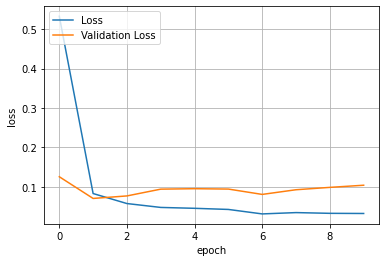

In [56]:
new_model()